In [24]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler

In [12]:
# Load and clean the dataset
df = pd.read_csv('milknew(rapi).csv')
df = df['pH;Temprature;Taste;Odor;Fat ;Turbidity;Colour;Grade'].str.split(';', expand=True)
df.columns = ['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour', 'Grade']

# Convert relevant columns to numeric types
numeric_columns = ['pH', 'Temperature', 'Taste', 'Odor', 'Fat', 'Turbidity', 'Colour']
df[numeric_columns] = df[numeric_columns].apply(pd.to_numeric)

print(df.head())

    pH  Temperature  Taste  Odor  Fat  Turbidity  Colour   Grade
0  6.6           35      1     0    1          0     254    high
1  6.6           36      0     1    0          1     253    high
2  8.5           70      1     1    1          1     246     low
3  9.5           34      1     1    0          1     255     low
4  6.6           37      0     0    0          0     255  medium


In [13]:
# Normalize predictors
target_column = 'Grade'
predictors = [col for col in df.columns if col != target_column]

# Apply Min-Max Scaling
scaler = MinMaxScaler()
df[predictors] = scaler.fit_transform(df[predictors])

# Display normalized summary
summary = df.describe().transpose()
print(summary)

              count      mean       std  min       25%       50%       75%  \
pH           1059.0  0.558480  0.215335  0.0  0.538462  0.569231  0.584615   
Temperature  1059.0  0.182618  0.180328  0.0  0.071429  0.125000  0.196429   
Taste        1059.0  0.546742  0.498046  0.0  0.000000  1.000000  1.000000   
Odor         1059.0  0.432483  0.495655  0.0  0.000000  0.000000  1.000000   
Fat          1059.0  0.671388  0.469930  0.0  0.000000  1.000000  1.000000   
Turbidity    1059.0  0.491029  0.500156  0.0  0.000000  0.000000  1.000000   
Colour       1059.0  0.789361  0.287162  0.0  0.666667  1.000000  1.000000   

             max  
pH           1.0  
Temperature  1.0  
Taste        1.0  
Odor         1.0  
Fat          1.0  
Turbidity    1.0  
Colour       1.0  


In [14]:
# Step 4 - Creating the Training and Test Datasets
X = df[predictors]
y = df[target_column]

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print('Training set size:', X_train.shape)
print('Test set size:', X_test.shape)

Training set size: (847, 7)
Test set size: (212, 7)


In [15]:
from sklearn.neural_network import MLPClassifier

mlp = MLPClassifier(hidden_layer_sizes=(8,8,8), activation='relu', solver='adam', max_iter=500)
mlp.fit(X_train,y_train)

predict_train = mlp.predict(X_train)
predict_test = mlp.predict(X_test)

c:\Users\M S I\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


In [25]:
# Hyperparameter tuning using GridSearchCV
from sklearn.exceptions import ConvergenceWarning
import warnings
warnings.filterwarnings('ignore', category=ConvergenceWarning)

param_grid = {
    'hidden_layer_sizes': [(8,8,8), (16,16,16), (32,32,32)],
    'activation': ['relu', 'tanh', 'logistic'],
    'solver': ['adam', 'sgd'],
    'learning_rate_init': [0.001, 0.01, 0.1],
    'max_iter': [500, 1000, 2000]
}

grid_search = GridSearchCV(MLPClassifier(random_state=42), param_grid, cv=3, scoring='accuracy', verbose=2)

# Fit the model and handle potential errors
try:
    grid_search.fit(X_train, y_train)
    # Best parameters and best score
    print('Best Parameters:', grid_search.best_params_)
    print('Best Cross-Validation Accuracy:', grid_search.best_score_)

    # Train the model with the best parameters
    best_mlp = grid_search.best_estimator_
    best_mlp.fit(X_train, y_train)

    # Evaluate the model
    predict_test = best_mlp.predict(X_test)
    test_accuracy = accuracy_score(y_test, predict_test)
    print('Test Accuracy with Best Parameters:', test_accuracy)
except Exception as e:
    print('Error during GridSearchCV:', e)

Fitting 3 folds for each of 162 candidates, totalling 486 fits
[CV] END activation=relu, hidden_layer_sizes=(8, 8, 8), learning_rate_init=0.001, max_iter=500, solver=adam; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(8, 8, 8), learning_rate_init=0.001, max_iter=500, solver=adam; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(8, 8, 8), learning_rate_init=0.001, max_iter=500, solver=adam; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(8, 8, 8), learning_rate_init=0.001, max_iter=500, solver=sgd; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(8, 8, 8), learning_rate_init=0.001, max_iter=500, solver=sgd; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(8, 8, 8), learning_rate_init=0.001, max_iter=500, solver=sgd; total time=   0.3s
[CV] END activation=relu, hidden_layer_sizes=(8, 8, 8), learning_rate_init=0.001, max_iter=1000, solver=adam; total time=   0.8s
[CV] END activation=relu, hidden_layer_size

In [19]:
# Evaluate the model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Training accuracy
train_accuracy = accuracy_score(y_train, predict_train)
print('Training Accuracy:', train_accuracy)

# Test accuracy
test_accuracy = accuracy_score(y_test, predict_test)
print('Test Accuracy:', test_accuracy)

# Classification report
print('Classification Report:\n', classification_report(y_test, predict_test))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, predict_test)
print('Confusion Matrix:\n', conf_matrix)

Training Accuracy: 0.9397874852420307
Test Accuracy: 0.910377358490566
Classification Report:
               precision    recall  f1-score   support

        high       0.78      0.88      0.82        48
         low       0.99      0.97      0.98        78
      medium       0.93      0.87      0.90        86

    accuracy                           0.91       212
   macro avg       0.90      0.91      0.90       212
weighted avg       0.91      0.91      0.91       212

Confusion Matrix:
 [[42  1  5]
 [ 1 76  1]
 [11  0 75]]


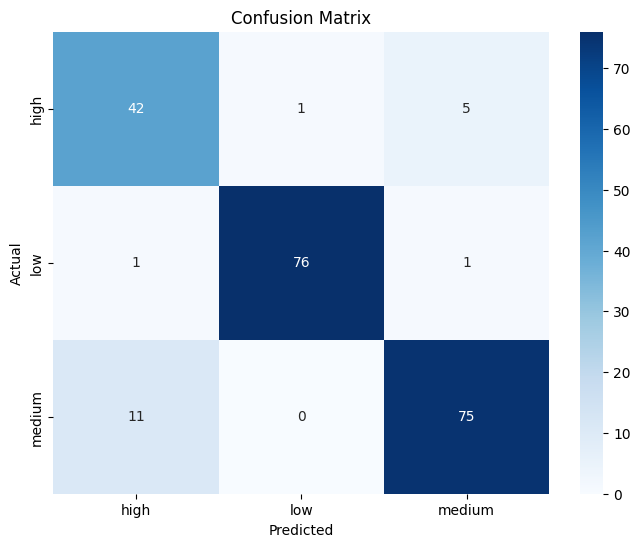

In [20]:
# Visualize the confusion matrix
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=mlp.classes_, yticklabels=mlp.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()